In [135]:
!pip install plotly


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats

Informacion general y descripcion de los datos:

In [137]:
listings_detailed = pd.read_csv('listings.csv')

In [138]:
listings_detailed.shape

(25288, 79)

In [139]:
listings_detailed.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.528800e+04,2.528800e+04,2.528800e+04,25269.000000,25269.000000,25288.000000,25288.000000,25288.000000,19270.000000,22737.000000,...,20090.000000,20090.000000,20091.000000,20088.000000,20087.000000,25288.000000,25288.000000,25288.000000,25288.000000,20091.000000
mean,6.439293e+17,2.025031e+13,2.583530e+08,53.929400,63.880169,40.421572,-3.693851,3.159206,1.286897,1.437173,...,4.678302,4.742479,4.747868,4.747256,4.549966,36.220263,32.311768,3.836958,0.042036,1.778151
std,5.357949e+17,0.000000e+00,2.083118e+08,144.357627,193.134128,0.023441,0.027972,1.905684,0.628857,0.995338,...,0.456137,0.448347,0.474671,0.383183,0.518818,81.239399,80.203422,16.249609,0.589461,1.914170
min,2.185300e+04,2.025031e+13,7.952000e+03,1.000000,1.000000,40.331400,-3.883990,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,3.676095e+07,2.025031e+13,5.168513e+07,1.000000,2.000000,40.409288,-3.707420,2.000000,1.000000,1.000000,...,4.590000,4.700000,4.720000,4.670000,4.440000,1.000000,0.000000,0.000000,0.000000,0.360000
50%,8.115619e+17,2.025031e+13,2.228602e+08,4.000000,5.000000,40.420382,-3.700932,2.000000,1.000000,1.000000,...,4.800000,4.860000,4.890000,4.870000,4.670000,3.000000,1.000000,0.000000,0.000000,1.130000
75%,1.142574e+18,2.025031e+13,4.488906e+08,25.000000,33.000000,40.431617,-3.684771,4.000000,1.500000,2.000000,...,4.950000,4.990000,5.000000,4.980000,4.840000,19.000000,12.000000,1.000000,0.000000,2.630000
max,1.369179e+18,2.025031e+13,6.821759e+08,3311.000000,8554.000000,40.577290,-3.545904,16.000000,15.000000,25.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,341.000000,341.000000,168.000000,12.000000,28.570000


In [140]:
listings_detailed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25288 entries, 0 to 25287
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            25288 non-null  int64  
 1   listing_url                                   25288 non-null  object 
 2   scrape_id                                     25288 non-null  int64  
 3   last_scraped                                  25288 non-null  object 
 4   source                                        25288 non-null  object 
 5   name                                          25288 non-null  object 
 6   description                                   24375 non-null  object 
 7   neighborhood_overview                         11218 non-null  object 
 8   picture_url                                   25287 non-null  object 
 9   host_id                                       25288 non-null 

In [141]:
listings_detailed.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,21853,https://www.airbnb.com/rooms/21853,20250305023340,2025-03-11,city scrape,Bright and airy room,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,83531,...,4.82,4.21,4.67,NaN,f,2,0,2,0,0.26
1,30320,https://www.airbnb.com/rooms/30320,20250305023340,2025-03-10,previous scrape,Great Vacational Apartments,NaN,NaN,https://a0.muscache.com/pictures/336868/f67409...,130907,...,4.78,4.90,4.69,NaN,f,3,3,0,0,0.96
2,30959,https://www.airbnb.com/rooms/30959,20250305023340,2025-03-10,previous scrape,Beautiful loft in Madrid Center,Beautiful Loft 60m2 size just in the historica...,NaN,https://a0.muscache.com/pictures/78173471/835e...,132883,...,4.63,4.88,4.25,NaN,f,1,1,0,0,0.07
3,40916,https://www.airbnb.com/rooms/40916,20250305023340,2025-03-10,previous scrape,Holiday Apartment Madrid Center,NaN,NaN,https://a0.muscache.com/pictures/336736/c3b486...,130907,...,4.79,4.88,4.55,NaN,f,3,3,0,0,0.28
4,62423,https://www.airbnb.com/rooms/62423,20250305023340,2025-03-12,city scrape,MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID,INCREDIBLE HOME OF AN ARTIST SURROUNDED BY PAI...,DISTRICT WITH VERY GOOD VIBES IN THE MIDDLE OF...,https://a0.muscache.com/pictures/miso/Hosting-...,303845,...,4.85,4.97,4.58,NaN,f,3,1,2,0,2.73


Limpieza de datos:

In [142]:
#Exclusión de columnas irrelevantes
eda_columns = [
    'price', 'accommodates', 'bedrooms', 'beds','bathrooms_text', 'amenities',
    'availability_365', 'number_of_reviews','reviews_per_month', 'review_scores_rating',
    'review_scores_cleanliness', 'review_scores_location', 'review_scores_accuracy', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_value',
    'property_type', 'room_type', 'neighbourhood_cleansed', 'amenities',
    'host_is_superhost', 'host_response_rate', 'instant_bookable',
    'host_since', 'host_listings_count', 'latitude', 'longitude',
    'availability_30', 'availability_60', 'availability_90',
    'availability_365']

In [143]:
df_EDA =listings_detailed[eda_columns].copy()

 Descripción de los datos limpiados:

In [144]:
df_EDA.shape
df_EDA.describe()
df_EDA.info()
df_EDA.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25288 entries, 0 to 25287
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        19274 non-null  object 
 1   accommodates                 25288 non-null  int64  
 2   bedrooms                     22737 non-null  float64
 3   beds                         19262 non-null  float64
 4   bathrooms_text               25263 non-null  object 
 5   amenities                    25288 non-null  object 
 6   availability_365             25288 non-null  int64  
 7   number_of_reviews            25288 non-null  int64  
 8   reviews_per_month            20091 non-null  float64
 9   review_scores_rating         20091 non-null  float64
 10  review_scores_cleanliness    20090 non-null  float64
 11  review_scores_location       20088 non-null  float64
 12  review_scores_accuracy       20091 non-null  float64
 13  review_scores_ch

,price,accommodates,bedrooms,beds,bathrooms_text,amenities,availability_365,number_of_reviews,reviews_per_month,review_scores_rating,...,host_response_rate,instant_bookable,host_since,host_listings_count,latitude,longitude,availability_30,availability_60,availability_90,availability_365
0,$29.00,1,1.0,1.0,1 bath,"[""Wifi"", ""Bed linens"", ""Dishes and silverware""...",233,33,0.26,4.58,...,NaN,f,2010-02-21,2.0,40.40381,-3.74130,0,0,0,233
1,NaN,2,1.0,NaN,1 bath,"[""Kitchen"", ""Air conditioning"", ""Elevator"", ""T...",0,172,0.96,4.63,...,NaN,f,2010-05-24,3.0,40.41476,-3.70418,0,0,0,0
2,NaN,2,1.0,NaN,1 bath,"[""Shampoo"", ""Smoking allowed"", ""Pets allowed"",...",0,8,0.07,4.38,...,NaN,f,2010-05-26,1.0,40.41259,-3.70105,0,0,0,0
3,NaN,3,1.0,NaN,1 bath,"[""Pets allowed"", ""Kitchen"", ""TV"", ""Air conditi...",0,49,0.28,4.65,...,NaN,f,2010-05-24,3.0,40.42247,-3.70577,0,0,0,0
4,$77.00,4,1.0,2.0,1.5 shared baths,"[""Host greets you"", ""Dishes and silverware"", ""...",298,227,2.73,4.64,...,100%,f,2010-11-29,3.0,40.41884,-3.69655,12,21,37,298


Duplicatos:

In [145]:
# Number of duplicates
print(f"Number of duplicates: {df_EDA.duplicated().sum()}")

Number of duplicates: 0


Valores nulos:

In [146]:
# Общее количество пропущенных значений / Total number of missing values
print(f"Total number of missing values: {df_EDA.isnull().sum().sum()}")

# Количество пропущенных значений по колонкам / Number of missing values by columns
print("\nNumber of missing values by columns:")
print(df_EDA.isnull().sum())

# Процент пропущенных значений / # Percentage of missing values
print("\nPercentage of missing values:")
print((df_EDA.isnull().sum() / len(df_EDA) * 100).round(2))

Total number of missing values: 62324

Number of missing values by columns:
price                          6014
accommodates                      0
bedrooms                       2551
beds                           6026
bathrooms_text                   25
amenities                         0
availability_365                  0
number_of_reviews                 0
reviews_per_month              5197
review_scores_rating           5197
review_scores_cleanliness      5198
review_scores_location         5200
review_scores_accuracy         5197
review_scores_checkin          5198
review_scores_communication    5197
review_scores_value            5201
property_type                     0
room_type                         0
neighbourhood_cleansed            0
amenities                         0
host_is_superhost               792
host_response_rate             5293
instant_bookable                  0
host_since                       19
host_listings_count              19
latitude                

In [147]:
# Очищаем цены от символов и преобразуем в числа /Clean prices by removing symbols and convert to numbers
df_EDA['price'] = df_EDA['price'].str.replace('$', '').str.replace(',', '').astype(float)

# Проверяем количество нулевых значений /Check the number of null values
print(f"\nКоличество нулевых значений: {df_EDA['price'].isna().sum()}")

# Удаляем строки с нулевыми значениями / Remove rows with zero values
df_EDA_final = df_EDA[df_EDA['price'] != 0]
df_EDA_final = df_EDA_final.dropna(subset=['price'])
print(f"Number of rows after removing zero prices: {len(df_EDA_final)}")

# Сохраняем обновленный датафрейм /Save the updated dataframe
#df_EDA_final.to_csv('../data/df_EDA_final.csv', index=False)
#print("Updated dataframe successfully saved to data folder")


Количество нулевых значений: 6014
Number of rows after removing zero prices: 19274


In [148]:
# Количество пропущенных значений по колонкам /Number of missing values by columns
print("\nMissing values by columns:")
print(df_EDA_final.isnull().sum())

# Процент пропущенных значений /Percentage of missing values
print("\nPercentage of missing values:")
print((df_EDA_final.isnull().sum() / len(df_EDA_final) * 100).round(2))


Missing values by columns:
price                             0
accommodates                      0
bedrooms                         24
beds                             19
bathrooms_text                   16
amenities                         0
availability_365                  0
number_of_reviews                 0
reviews_per_month              3178
review_scores_rating           3178
review_scores_cleanliness      3179
review_scores_location         3178
review_scores_accuracy         3178
review_scores_checkin          3179
review_scores_communication    3178
review_scores_value            3178
property_type                     0
room_type                         0
neighbourhood_cleansed            0
amenities                         0
host_is_superhost               692
host_response_rate             1332
instant_bookable                  0
host_since                       10
host_listings_count              10
latitude                          0
longitude                         0


In [149]:
# Количество уникальных значений в каждой колонке /Number of unique values in each column
print("\nNumber of unique values in each column:")
print(df_EDA_final.nunique())


Number of unique values in each column:
price                            665
accommodates                      16
bedrooms                          14
beds                              22
bathrooms_text                    33
amenities                      17018
availability_365                 366
number_of_reviews                585
reviews_per_month                955
review_scores_rating             160
review_scores_cleanliness        161
review_scores_location           152
review_scores_accuracy           151
review_scores_checkin            144
review_scores_communication      148
review_scores_value              170
property_type                     56
room_type                          4
neighbourhood_cleansed           128
amenities                      17018
host_is_superhost                  2
host_response_rate                82
instant_bookable                   2
host_since                      3723
host_listings_count              111
latitude                       132

In [150]:
# Создаем список колонок для анализа / Create a list of columns for analysis
review_columns = [
    'reviews_per_month',
    'review_scores_rating',
    'review_scores_cleanliness',
    'review_scores_location',
    'review_scores_accuracy',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_value'
]

# Анализ распределения значений /Analysis of the distribution of values
for col in review_columns:
    print(f"\nAnalysis of column {col}:")
    print("Statistics:")
    print(df_EDA_final[col].describe())
    print("\nDistribution of values:")
    print(df_EDA_final[col].value_counts().head())


Analysis of column reviews_per_month:
Statistics:
count    16096.000000
mean         2.033198
std          1.976161
min          0.010000
25%          0.560000
50%          1.460000
75%          2.960000
max         28.570000
Name: reviews_per_month, dtype: float64

Distribution of values:
reviews_per_month
1.00    300
2.00    121
0.06    114
0.10    110
0.11    105
Name: count, dtype: int64

Analysis of column review_scores_rating:
Statistics:
count    16096.000000
mean         4.646325
std          0.469602
min          1.000000
25%          4.550000
50%          4.760000
75%          4.910000
max          5.000000
Name: review_scores_rating, dtype: float64

Distribution of values:
review_scores_rating
5.00    2620
4.50     457
4.00     454
4.67     428
4.75     397
Name: count, dtype: int64

Analysis of column review_scores_cleanliness:
Statistics:
count    16095.000000
mean         4.686723
std          0.428186
min          1.000000
25%          4.600000
50%          4.800000
75%

In [151]:
# Матрица корреляции для колонок с отзывами /Correlation matrix for columns with reviews
review_correlation = df_EDA_final[review_columns].corr()
print("\nCorrelation between columns with reviews:")
print(review_correlation)


Correlation between columns with reviews:
                             reviews_per_month  review_scores_rating  \
reviews_per_month                     1.000000              0.135262   
review_scores_rating                  0.135262              1.000000   
review_scores_cleanliness             0.126123              0.776100   
review_scores_location                0.090921              0.565753   
review_scores_accuracy                0.135220              0.851130   
review_scores_checkin                 0.124925              0.738942   
review_scores_communication           0.153192              0.796500   
review_scores_value                   0.172540              0.873696   

                             review_scores_cleanliness  \
reviews_per_month                             0.126123   
review_scores_rating                          0.776100   
review_scores_cleanliness                     1.000000   
review_scores_location                        0.497745   
review_scores_accu

In [152]:
# Проверка, связаны ли пропущенные значения с другими колонками / Check if missing values are related to other columns  
for col in review_columns:
    print(f"\nAnalysis of missing values in {col}:")
    # Проверяем, есть ли связь с количеством отзывов / Check if there is a relationship with the number of reviews
    print("Average number of reviews for missing values:")
    print(df_EDA_final[df_EDA_final[col].isnull()]['number_of_reviews'].mean())
    print("Average number of reviews for filled values:")
    print(df_EDA_final[df_EDA_final[col].notnull()]['number_of_reviews'].mean())


Analysis of missing values in reviews_per_month:
Average number of reviews for missing values:
0.0
Average number of reviews for filled values:
66.80280815109344

Analysis of missing values in review_scores_rating:
Average number of reviews for missing values:
0.0
Average number of reviews for filled values:
66.80280815109344

Analysis of missing values in review_scores_cleanliness:
Average number of reviews for missing values:
0.00031456432840515884
Average number of reviews for filled values:
66.80689655172414

Analysis of missing values in review_scores_location:
Average number of reviews for missing values:
0.0
Average number of reviews for filled values:
66.80280815109344

Analysis of missing values in review_scores_accuracy:
Average number of reviews for missing values:
0.0
Average number of reviews for filled values:
66.80280815109344

Analysis of missing values in review_scores_checkin:
Average number of reviews for missing values:
0.00031456432840515884
Average number of revi

In [153]:
# Создаем копию датафрейма для безопасного заполнения / Create a copy of the dataframe for safe filling 
df_filled = df_EDA_final.copy()

# 1. Заполнение reviews_per_month / Fill reviews_per_month  
# Так как корреляция с другими колонками слабая, используем медиану
df_filled['reviews_per_month'] = df_filled['reviews_per_month'].fillna(df_filled['reviews_per_month'].median())

# 2. Заполнение рейтинговых колонок / Fill rating columns
# Используем review_scores_rating как основной предиктор / Use review_scores_rating as the main predictor   
rating_columns = [
    'review_scores_cleanliness',
    'review_scores_location',
    'review_scores_accuracy',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_value'
]

# Заполняем пропуски в review_scores_rating медианой / Fill missing values in review_scores_rating with the median  
df_filled['review_scores_rating'] = df_filled['review_scores_rating'].fillna(df_filled['review_scores_rating'].median())

# Заполняем остальные рейтинговые колонки на основе review_scores_rating / Fill other rating columns based on review_scores_rating  
for col in rating_columns:
    # Создаем временный датафрейм без пропусков / Create a temporary dataframe without missing values   
    temp_df = df_filled.dropna(subset=[col, 'review_scores_rating'])
    
    # Считаем средние значения для каждого уровня review_scores_rating / Calculate the mean values for each level of review_scores_rating  
    rating_means = temp_df.groupby('review_scores_rating')[col].mean()
    
    # Заполняем пропуски / Fill missing values
    df_filled[col] = df_filled.apply(
        lambda row: rating_means.get(row['review_scores_rating'], df_filled[col].median())
        if pd.isna(row[col]) else row[col],
        axis=1
    )

In [154]:
# Проверяем количество пропусков после заполнения
print("\nПропущенные значения после заполнения:")
print(df_filled[review_columns].isnull().sum())

# Проверяем статистики после заполнения
print("\nСтатистики после заполнения:")
print(df_filled[review_columns].describe())


Пропущенные значения после заполнения:
reviews_per_month              0
review_scores_rating           0
review_scores_cleanliness      0
review_scores_location         0
review_scores_accuracy         0
review_scores_checkin          0
review_scores_communication    0
review_scores_value            0
dtype: int64

Статистики после заполнения:
       reviews_per_month  review_scores_rating  review_scores_cleanliness  \
count       19274.000000          19274.000000               19274.000000   
mean            1.938686              4.665068                   4.703785   
std             1.818382              0.431210                   0.393162   
min             0.010000              1.000000                   1.000000   
25%             0.700000              4.600000                   4.660000   
50%             1.460000              4.760000                   4.790133   
75%             2.600000              4.880000                   4.910000   
max            28.570000             

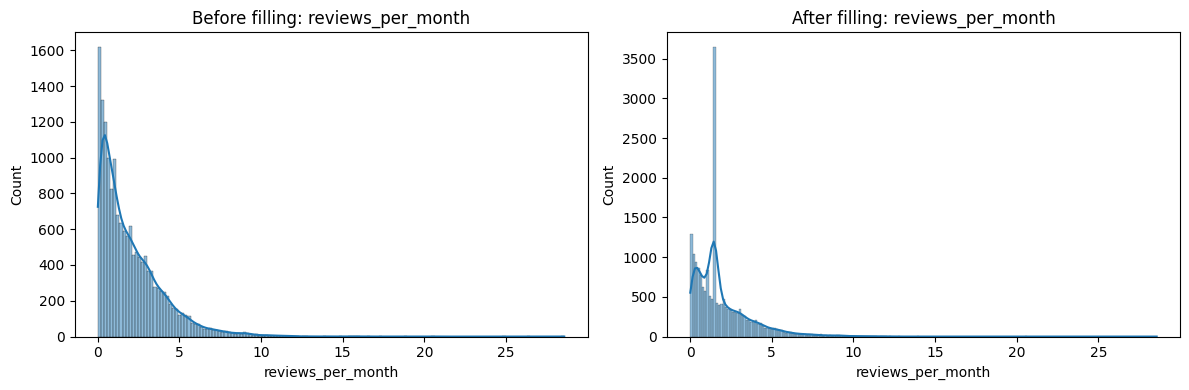

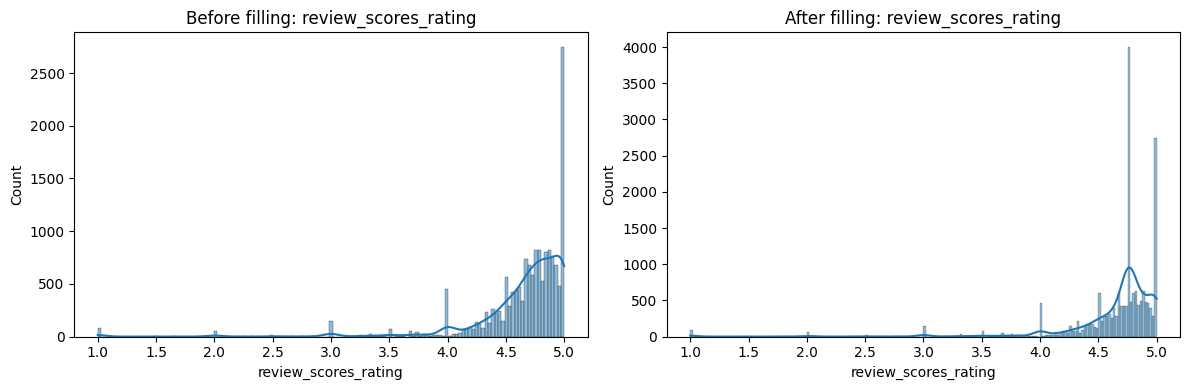

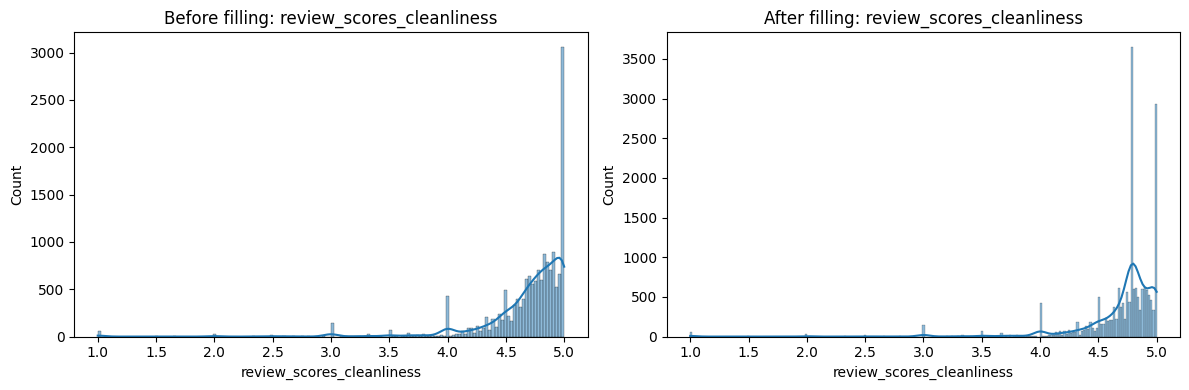

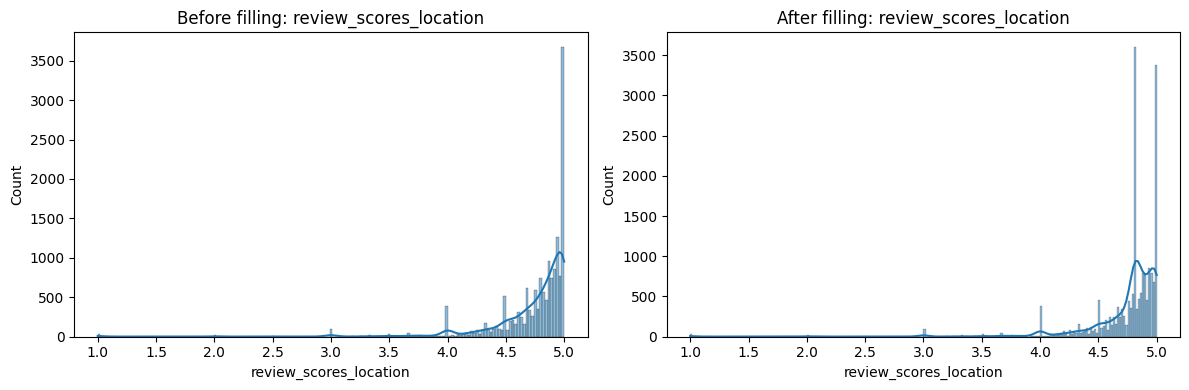

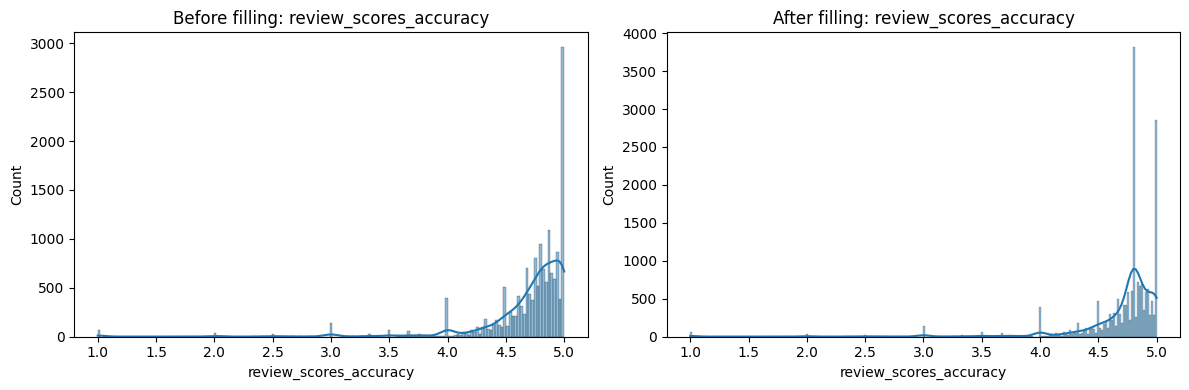

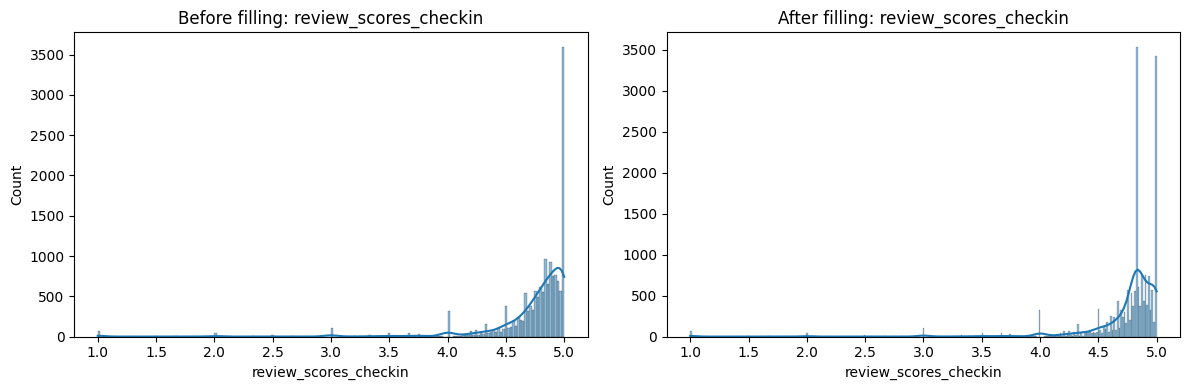

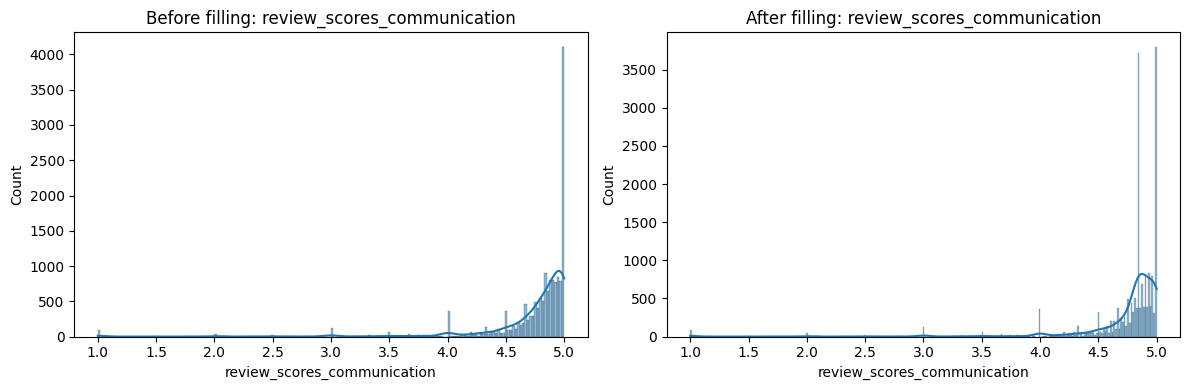

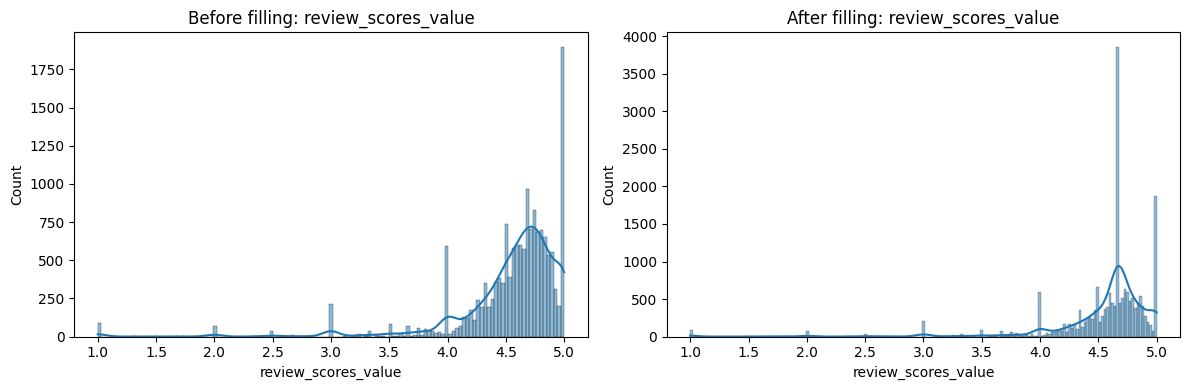

In [155]:
# Создаем графики до и после заполнения / Create graphs before and after filling
for col in review_columns:
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df_EDA_final[col].dropna(), kde=True)
    plt.title(f'Before filling: {col}')
    
    plt.subplot(1, 2, 2)
    sns.histplot(df_filled[col], kde=True)
    plt.title(f'After filling: {col}')
    
    plt.tight_layout()
    plt.show()

Outliers:

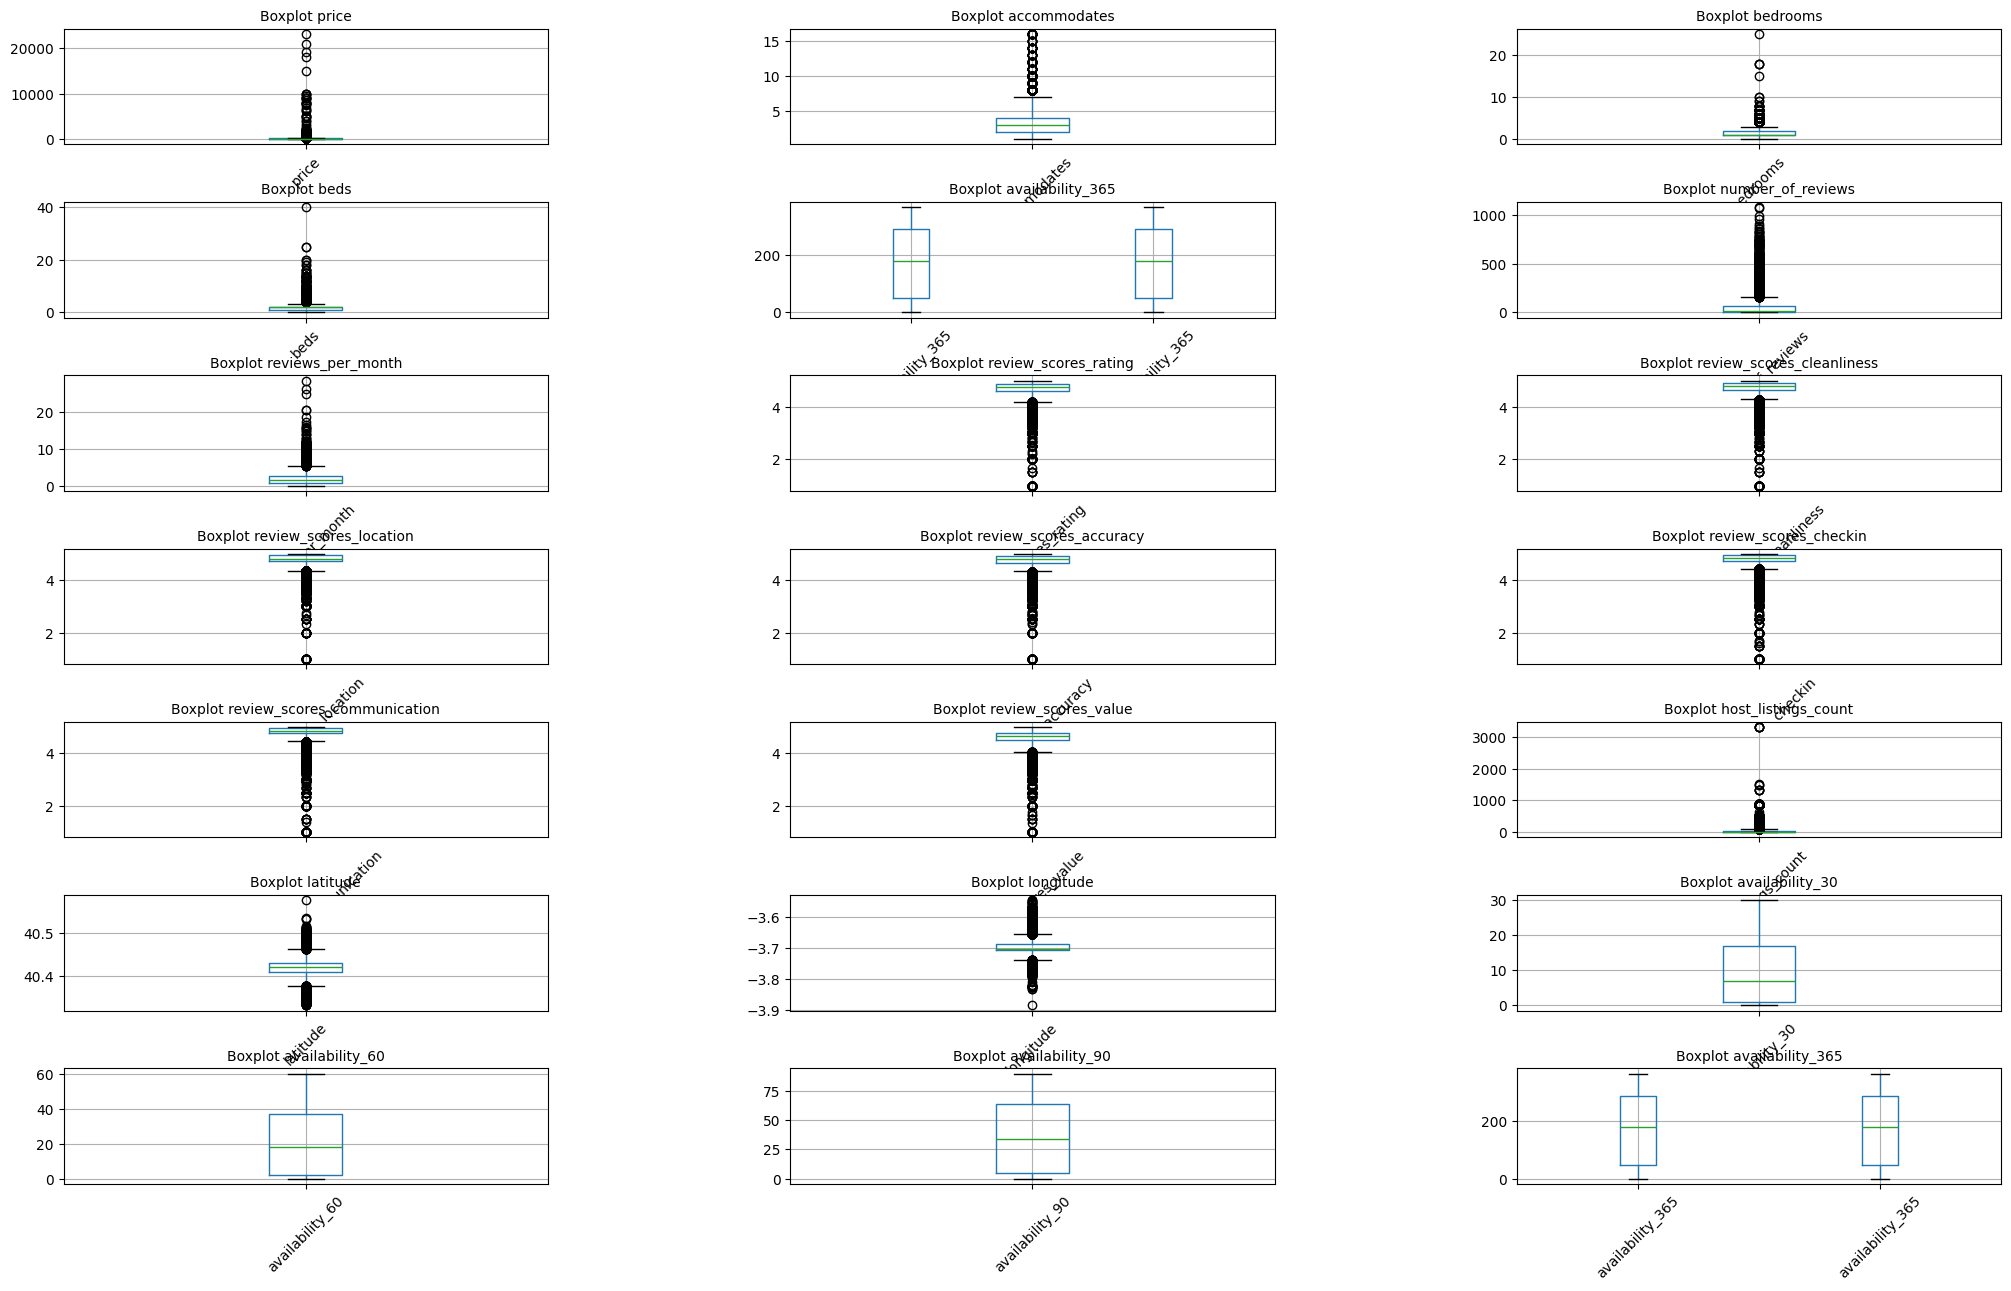

In [227]:
# Матрица корреляции для колонок с отзывами /Correlation matrix for columns with reviews
review_correlation = df_EDA_final[review_columns].corr()
plt.figure(figsize=(25, 15)) 
n_cols = 3  
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

# Boxplot для каждой числовой колонки / Boxplot for each numeric column
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    df_filled.boxplot(column=col)
    plt.title(f'Boxplot {col}', fontsize=10)  
    plt.xticks(rotation=45) 
    

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()


In [228]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Анализ выбросов для каждой числовой колонки / Analysis of outliers for each numeric column
for col in numeric_columns:
    outliers = detect_outliers(df_filled, col)
    print(f"\nOutlier analysis for {col}:")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Outliers percentage: {(len(outliers)/len(df_filled)*100):.2f}%")
    print("Outliers statistics:")
    print(outliers[col].describe())


Outlier analysis for price:
Number of outliers: 1286
Outliers percentage: 6.67%
Outliers statistics:
count     1286.000000
mean       674.472006
std       1573.400350
min        258.000000
25%        299.000000
50%        368.000000
75%        500.000000
max      23124.000000
Name: price, dtype: float64

Outlier analysis for accommodates:
Number of outliers: 692
Outliers percentage: 3.59%
Outliers statistics:
count    692.000000
mean       9.358382
std        2.139533
min        8.000000
25%        8.000000
50%        8.000000
75%       10.000000
max       16.000000
Name: accommodates, dtype: float64

Outlier analysis for bedrooms:
Number of outliers: 519
Outliers percentage: 2.69%
Outliers statistics:
count    519.000000
mean       4.732177
std        1.749668
min        4.000000
25%        4.000000
50%        4.000000
75%        5.000000
max       25.000000
Name: bedrooms, dtype: float64

Outlier analysis for beds:
Number of outliers: 2155
Outliers percentage: 11.18%
Outliers statis

ValueError: cannot reindex on an axis with duplicate labels


Analysis of the impact of outliers for price:
Statistics with outliers:
count    19274.000000
mean       138.965082
std        433.623184
min          8.000000
25%         65.000000
50%         97.000000
75%        142.000000
max      23124.000000
Name: price, dtype: float64

Statistics without outliers:
count    17988.000000
mean       100.680565
std         51.445147
min          8.000000
25%         63.000000
50%         93.000000
75%        131.000000
max        257.000000
Name: price, dtype: float64


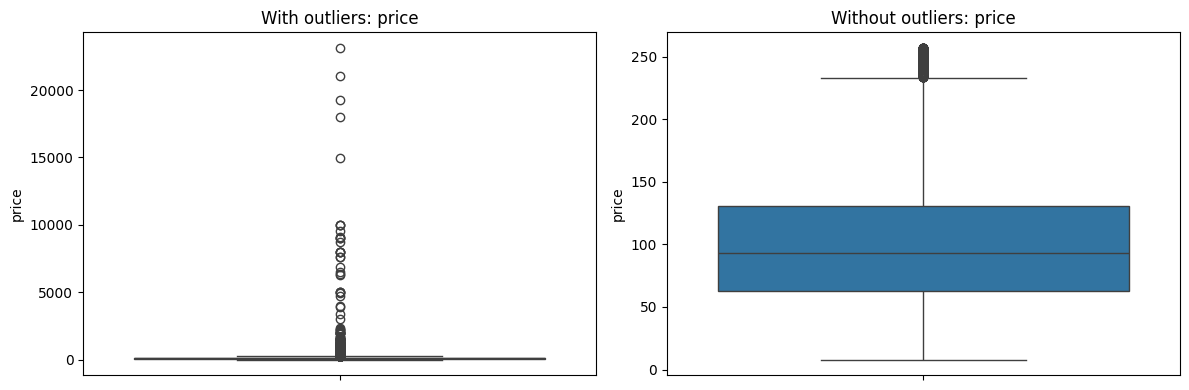


Analysis of the impact of outliers for accommodates:
Statistics with outliers:
count    19274.000000
mean         3.301754
std          1.933210
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         16.000000
Name: accommodates, dtype: float64

Statistics without outliers:
count    18582.000000
mean         3.076203
std          1.513019
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: accommodates, dtype: float64


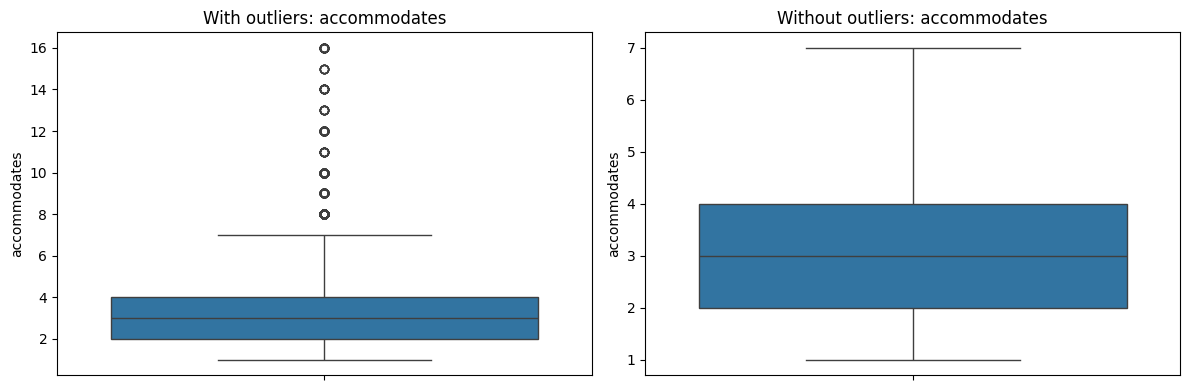


Analysis of the impact of outliers for bedrooms:
Statistics with outliers:
count    19250.000000
mean         1.385247
std          0.941618
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         25.000000
Name: bedrooms, dtype: float64

Statistics without outliers:
count    18731.000000
mean         1.292510
std          0.712423
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: bedrooms, dtype: float64


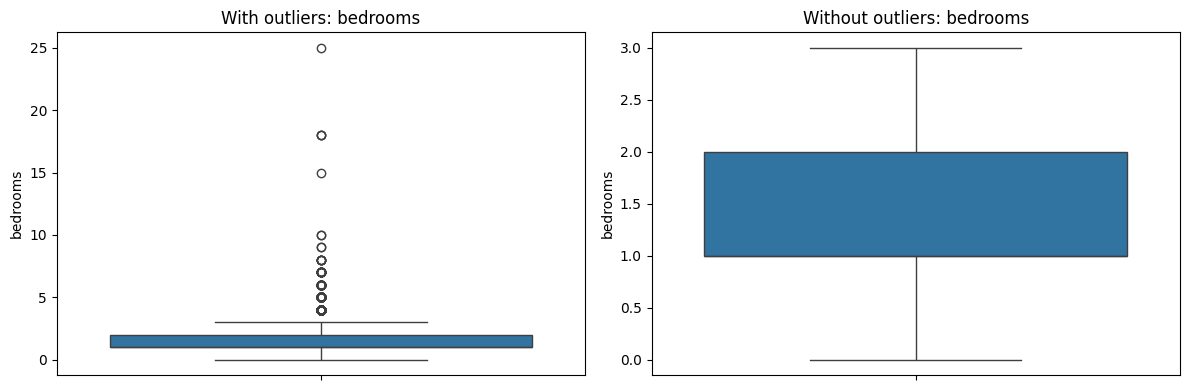


Analysis of the impact of outliers for beds:
Statistics with outliers:
count    19255.000000
mean         1.984627
std          1.456824
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         40.000000
Name: beds, dtype: float64

Statistics without outliers:
count    17100.000000
mean         1.604678
std          0.759355
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: beds, dtype: float64


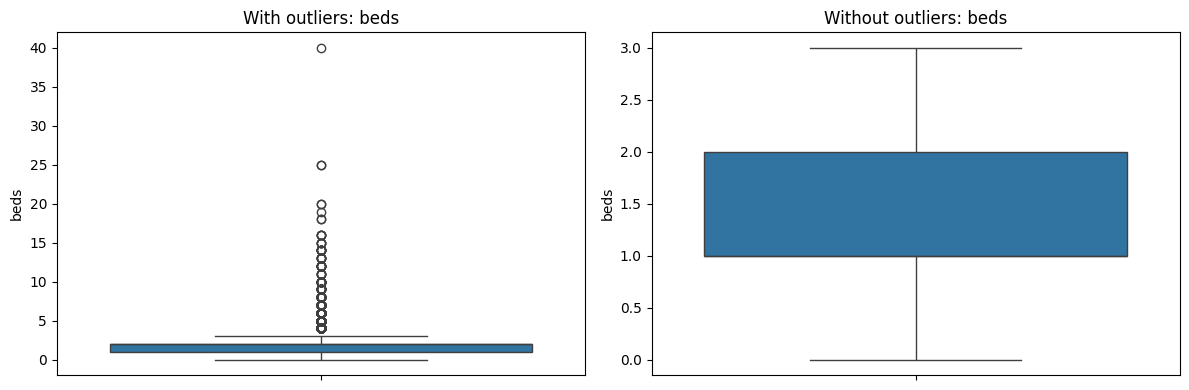

ValueError: cannot reindex on an axis with duplicate labels

In [236]:
def analyze_outlier_impact(df, column):
    # Создаем копию без выбросов / Create a copy without outliers
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mask = (df[column] >= lower_bound) & (df[column] <= upper_bound)
    
    df_no_outliers = df[mask].copy()
    
    # Сравниваем статистики / Compare statistics
    print(f"\nAnalysis of the impact of outliers for {column}:")
    print("Statistics with outliers:")
    print(df[column].describe())
    print("\nStatistics without outliers:")
    print(df_no_outliers[column].describe())
    
    # Визуализация / Visualization
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[column])
    plt.title(f'With outliers: {column}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_no_outliers[column])
    plt.title(f'Without outliers: {column}')
    plt.tight_layout()
    plt.show()

# Применяем анализ для каждой колонки / Apply analysis for each column
for col in numeric_columns:
    analyze_outlier_impact(df_filled, col)

In [239]:
def get_outliers_df(df, column):
   # Calculate boundaries for outliers / Вычисляем границы для выбросов
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Create a mask for outliers / Создаем маску для выбросов
    mask = (df[column] < lower_bound) | (df[column] > upper_bound)
    
    # Create a dataframe with only outliers / Создаем датафрейм только с выбросами
    outliers_df = df[mask].copy()
    
    # Add information about boundaries / Добавляем информацию о границах
    outliers_df[f'{column}_lower_bound'] = lower_bound
    outliers_df[f'{column}_upper_bound'] = upper_bound
    
    return outliers_df

# Example usage for one column / Пример использования для одной колонки
column_name = 'price'  
outliers_df = get_outliers_df(df_filled, column_name)

# Print information about outliers / Выводим информацию о выбросах
print(f"Number of outliers in column {column_name}: {len(outliers_df)}")
print(f"Percentage of outliers:  {(len(outliers_df)/len(df_filled)*100):.2f}%")
print("\nOutliers statistics:")
print(outliers_df[column_name].describe())
print("\nFirst outliers:")
print(outliers_df[[column_name, f'{column_name}_lower_bound', f'{column_name}_upper_bound']].head(20))

Количество выбросов в колонке price: 1286
Процент выбросов: 6.67%

Статистика выбросов:
count     1286.000000
mean       674.472006
std       1573.400350
min        258.000000
25%        299.000000
50%        368.000000
75%        500.000000
max      23124.000000
Name: price, dtype: float64

Первые 5 выбросов:
      price  price_lower_bound  price_upper_bound
29    351.0              -50.5              257.5
80    277.0              -50.5              257.5
100   259.0              -50.5              257.5
133   300.0              -50.5              257.5
147  1131.0              -50.5              257.5
178   277.0              -50.5              257.5
234   459.0              -50.5              257.5
272   258.0              -50.5              257.5
285   312.0              -50.5              257.5
313  1286.0              -50.5              257.5
359   351.0              -50.5              257.5
362   280.0              -50.5              257.5
366   385.0              -50.5        

In [241]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [242]:
# Create a dataframe with prices above 1000 / Создаем датафрейм с ценами выше 1000
high_price_df = df_filled[df_filled['price'] > 1000]

# Print all rows with prices above 1000 / Выводим все строки с ценами выше 1000
print(f"\nNumber of rows with price above 1000: {len(high_price_df)}")
print("\nAll rows with price above 1000:")
print(high_price_df[['price']].sort_values('price', ascending=False))

# If more information about each row is needed / Если нужно вывести больше информации о каждой строке
print("\nDetailed information about rows with price above 1000:")
print(high_price_df.sort_values('price', ascending=False))


Количество строк с ценой выше 1000: 84

Все строки с ценой выше 1000:
         price
17547  23124.0
7887   21013.0
2602   19276.0
15022  17999.0
23767  14965.0
21865  10000.0
10239   9999.0
8406    9999.0
413     9514.0
4417    9090.0
17062   9059.0
17063   9059.0
17064   9059.0
7769    8698.0
8282    8000.0
8039    8000.0
7719    8000.0
14151   7999.0
10838   7650.0
7737    7600.0
18423   6866.0
14335   6517.0
1873    6375.0
5029    6300.0
7711    5000.0
8053    5000.0
7962    5000.0
16942   4961.0
14218   4720.0
6001    3990.0
22796   3890.0
9580    3420.0
7170    3000.0
4115    2369.0
9912    2251.0
25268   2171.0
25266   2171.0
5531    2100.0
8761    2069.0
25230   2000.0
25264   2000.0
20194   2000.0
25260   2000.0
25250   2000.0
2095    1900.0
10123   1700.0
5677    1700.0
20304   1665.0
7406    1545.0
23780   1503.0
19992   1502.0
5461    1500.0
22380   1500.0
11905   1500.0
22672   1500.0
1318    1466.0
17819   1429.0
22689   1407.0
22653   1407.0
22692   1407.0
5671    1400.0

Analize rows with unrealistic price values:

In [243]:
# Create a copy of the dataframe for safe processing / Создаем копию датафрейма для безопасной обработки
df_cleaned = df_filled.copy()

# Define reasonable price boundaries for Madrid / Определяем разумные границы цены для Мадрида
# Average nightly price in Madrid usually doesn't exceed 300-400€ / Средняя цена за ночь в Мадриде обычно не превышает 300-400€
# Setting upper limit at 1000€ as reasonable maximum / Установим верхнюю границу в 1000€ как разумный максимум
max_reasonable_price = 1000

# removing rows / Удаляем строки с нереальными ценами  
df_cleaned = df_filled[df_filled['price'] <= max_reasonable_price].copy()

print(f"Number of removed rows: {len(df_filled) - len(df_cleaned)}")
print(f"Percentage of removed rows: {((len(df_filled) - len(df_cleaned))/len(df_filled)*100):.2f}%")

Количество удаленных строк: 84
Процент удаленных строк: 0.44%


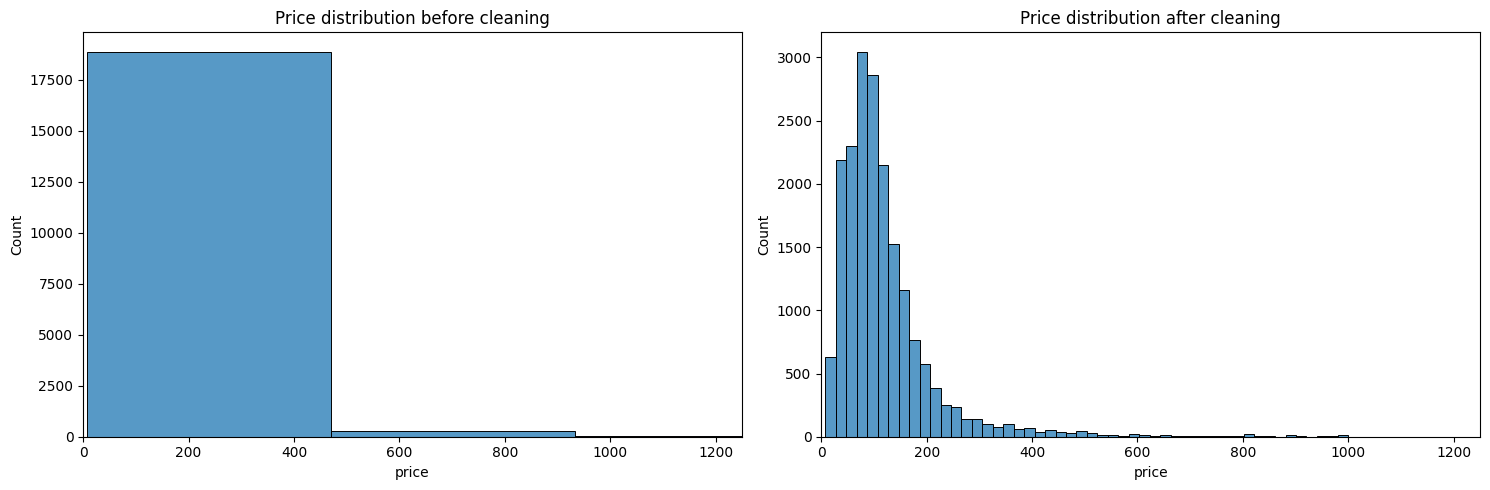

In [248]:
# Visualization for verification / Визуализация для проверки
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_filled['price'], bins=50)
plt.title('Price distribution before cleaning')
plt.xlim(0, 1250) 

plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['price'], bins=50)
plt.title('Price distribution after cleaning')
plt.xlim(0, 1250)

plt.tight_layout()
plt.show()